In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, roc_auc_score, roc_curve

In [16]:
#loading the dataset to pandas dataframe
df = pd.read_csv("E:\\College\\Python\\fraudTest.csv")

In [17]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
def segment_by_amount(row):
    if row['amt']>100:
        return 'High Value'
    elif row['amt']>50:
        return 'Medium Value'
    else:
        return 'Low Value'
    
df['AmountSegment'] = df.apply(segment_by_amount, axis=1)
print(df.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497   
1  Williams      F             3638 Marsh Union  ... -110.4360

<function matplotlib.pyplot.show(close=None, block=None)>

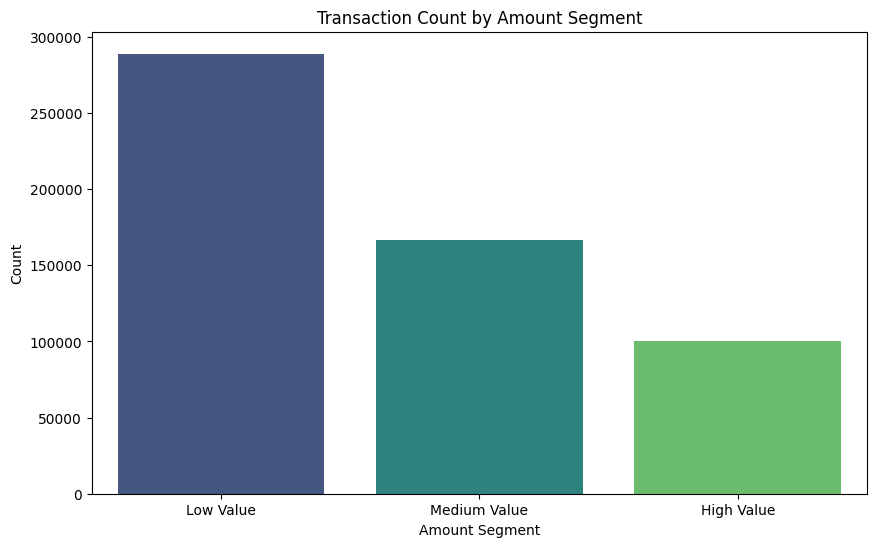

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='AmountSegment', data=df, palette='viridis', hue='AmountSegment', legend=False)
plt.title('Transaction Count by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show

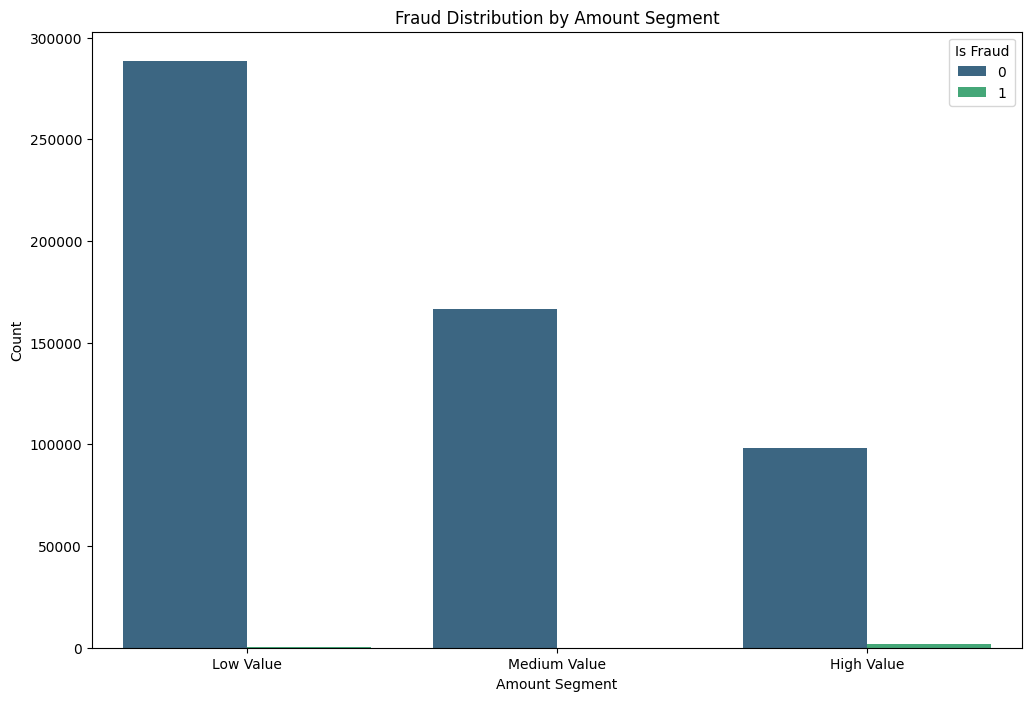

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='AmountSegment', hue='is_fraud', data=df, palette='viridis')
plt.title('Fraud Distribution by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_29248\2881178015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, palette='viridis',order=df['category'].value_counts().index)


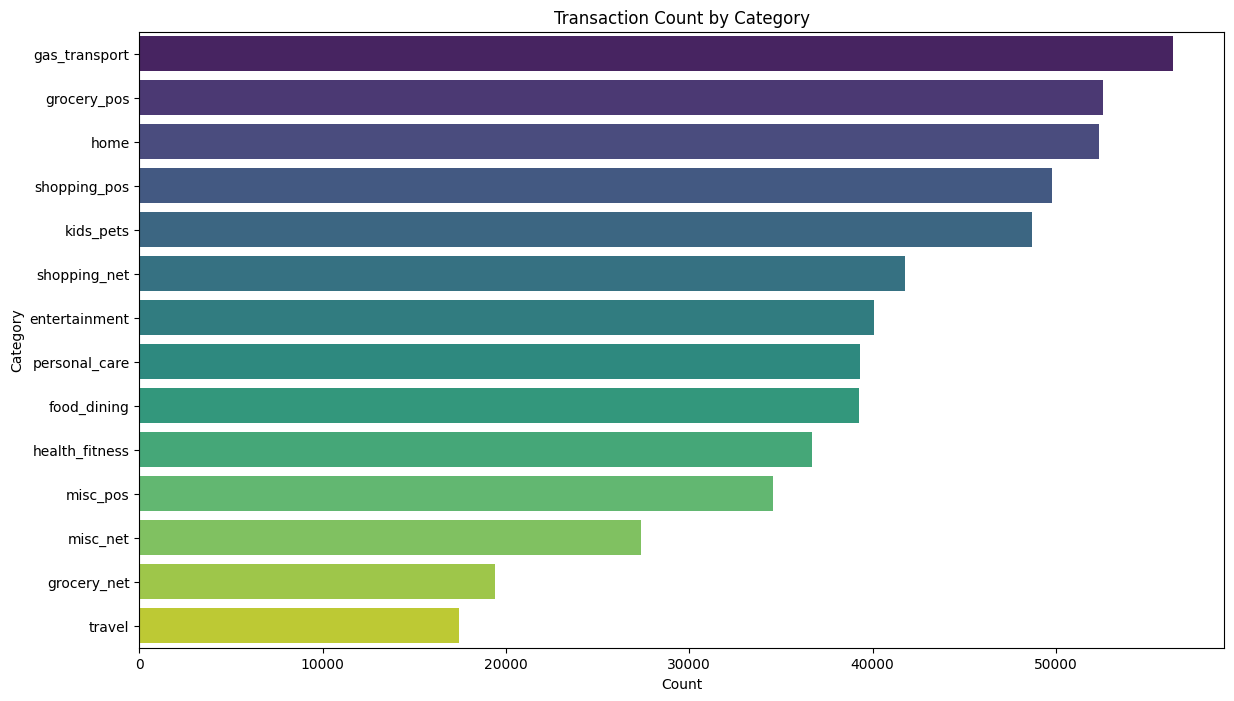

In [21]:
plt.figure(figsize=(14,8))
sns.countplot(y='category', data=df, palette='viridis',order=df['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [22]:
df=pd.read_csv("E:\\College\\Python\\fraudTest.csv")

# Use only first 2000 rows
df = df.head(2000)

# Display dataset info
print(df.head())
print(df.info())
print(df.describe())

# Fill missing values: Mean for numerical, Mode for categorical
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].fillna(df[column].mean())  # Fixed warning
    else:
        df[column] = df[column].fillna(df[column].mode()[0])  # Fixed warning

# Label encoding for categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state'])

# Define X (features) and Y (target)
x = df.drop(columns=['is_fraud'])  # Fixed syntax
y = df['is_fraud']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv("E:\\College\\Python\\fraudTest.csv")
df = df.head(2000)  # Use only 2000 rows

# Display basic info
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state'])

# Define features and target
x = df.drop(columns=['is_fraud'])  # Fixed the error in column selection
y = df['is_fraud']

# Split dataset (stratify=y ensures class balance in training and test sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Train models
log_reg.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
gb_clf.fit(x_train, y_train)

# Evaluate models using cross-validation
models = [log_reg, rf_clf, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} ROC-AUC: {scores.mean():.2f} ± {scores.std():.2f}")

# Model evaluation function
def evaluate_model(model, x_test, y_test):
    y_prob = model.predict_proba(x_test)[:, 1]  # Get probability scores
    threshold = 0.3  # Adjust this based on dataset
    y_pred = (y_prob > threshold).astype(int)  # Convert probabilities to binary predictions

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # Fix for undefined precision
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    return accuracy, precision, recall, f1, roc_auc

# Evaluate models
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, x_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [24]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(x_train, y_train)

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")  

# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(x_train, y_train)

print(f"Best parameters for Gradient Boosting: {grid_gb.best_params_}")  


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [25]:
# Get the best models from Grid Search
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

# Define models and names correctly
models = [log_reg, best_rf, best_gb]
model_names = ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']

# Function to evaluate models
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for ROC-AUC
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # Fix undefined metric warning
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate models and print results
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, x_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Logistic Regression - Accuracy: 0.99, Precision: 0.00, Recall: 0.00, F1-Score: 0.00, ROC-AUC: 0.88
Tuned Random Forest - Accuracy: 0.99, Precision: 1.00, Recall: 0.00, F1-Score: 0.00, ROC-AUC: 0.92
Tuned Gradient Boosting - Accuracy: 0.99, Precision: 0.00, Recall: 0.00, F1-Score: 0.00, ROC-AUC: 0.48


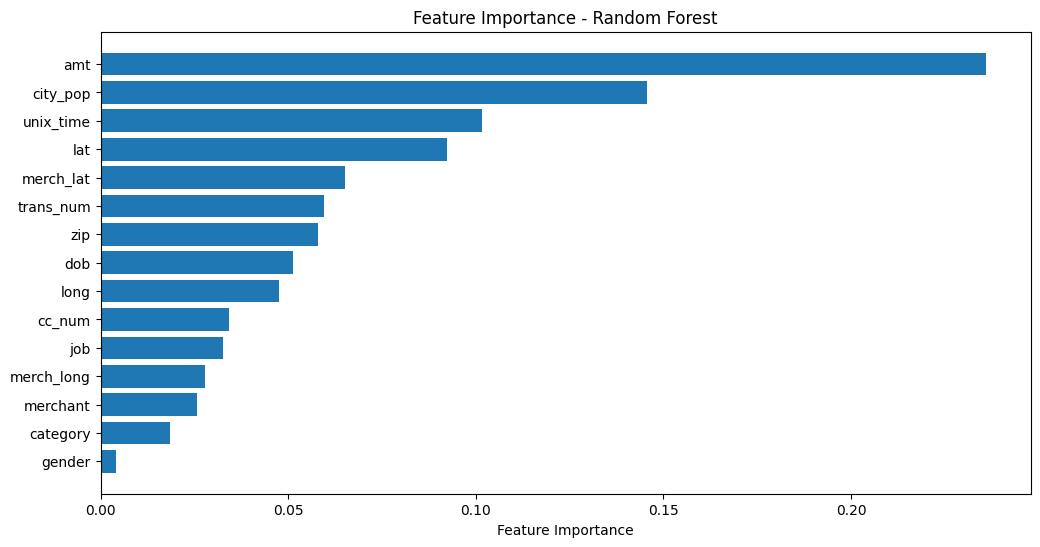

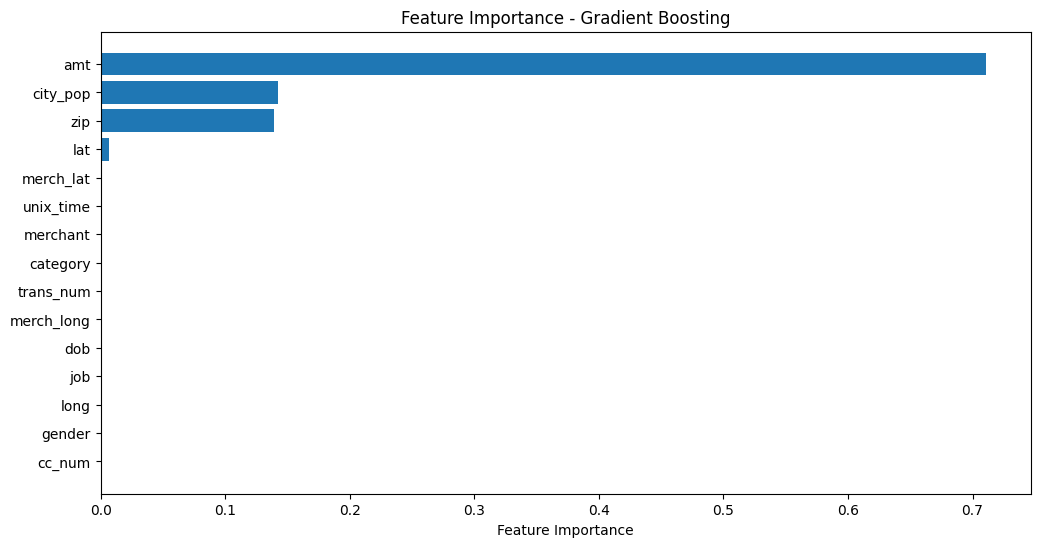

In [26]:
# Feature importance for Random Forest
feature_importance_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)

plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), x.columns[sorted_idx_rf])  # Ensure X has column names
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

# Feature importance for Gradient Boosting
feature_importance_gb = best_gb.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)

plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), x.columns[sorted_idx_gb])  # Ensure X has column names
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.show()


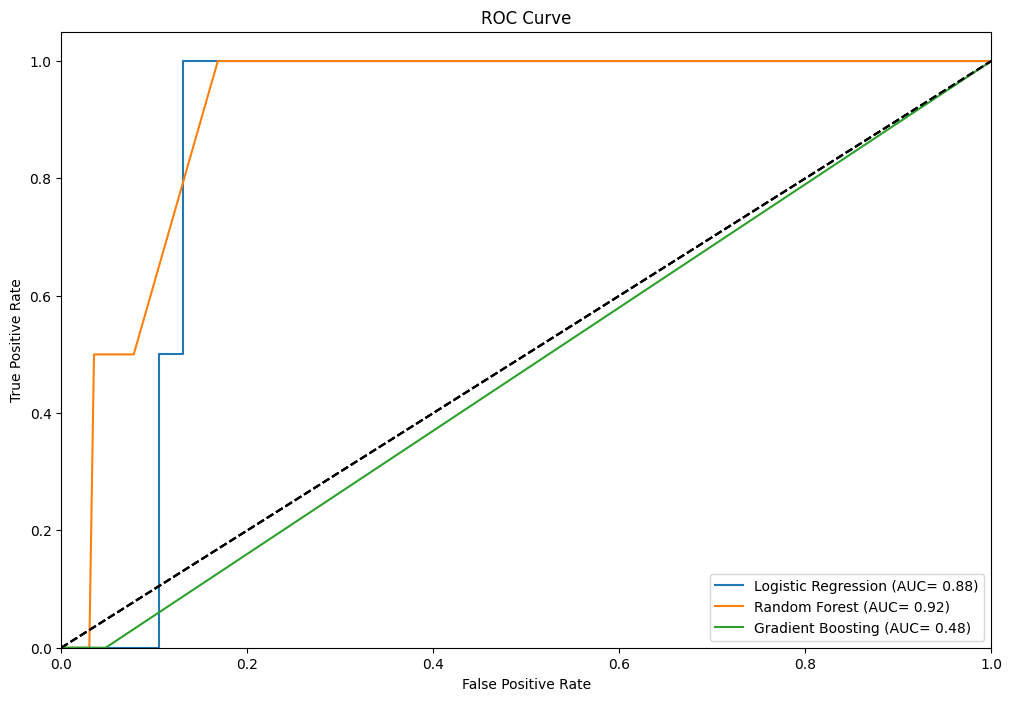

In [27]:
plt.figure(figsize=(12, 8))

for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Random Forest', 'Gradient Boosting']):
    y_prob = model.predict_proba(x_test)[:, 1]  # Get probabilities
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC= {roc_auc_score(y_test, y_prob):.2f})")  # Plot ROC with AUC score
    # Add reference line for random guessing
    plt.plot([0, 1], [0, 1], 'k--')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()
